
<hr>

## <h1 align="center"> Linear Regression <h1/>

<p>

<hr>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [2]:
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-08-16 23:34:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: 'FuelConsumption.csv'

     0K .......... .......... .......... .......... .......... 70% 96.3K 0s
    50K .......... ..........                                 100% 81.1K=0.8s

2021-08-16 23:34:40 (91.2 KB/s) - 'FuelConsumption.csv' saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


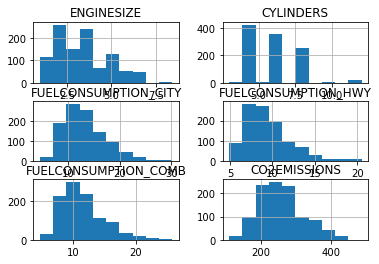

In [5]:
cdf.hist()
plt.show()

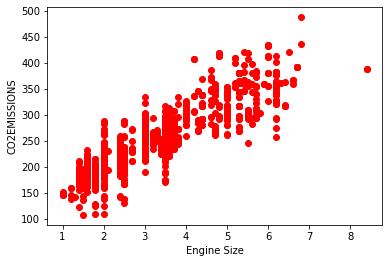

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
6,3.5,6,11.8,8.1,10.1,232
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212
10,2.4,4,11.2,8.1,9.8,225
12,5.9,12,18.0,12.6,15.6,359
16,4.7,8,17.4,11.3,14.7,338
17,4.7,8,18.1,12.2,15.4,354


In [8]:
test.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
5,3.5,6,11.9,7.7,10.0,230
7,3.7,6,12.8,9.0,11.1,255
11,3.5,6,12.1,8.3,10.4,239


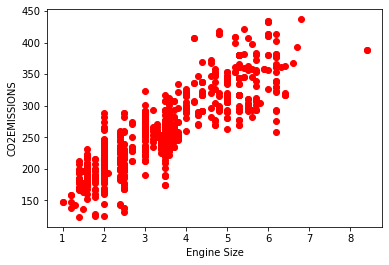

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2EMISSIONS')
plt.show()

<h2>Simple Linear Regression Model</h2>

In [10]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print("Coefficient: ", regr.coef_)
print("Intrecept:", regr.intercept_)

Coefficient:  [[38.55253708]]
Intrecept: [127.61259267]


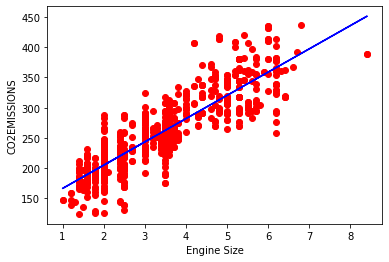

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-b')
plt.xlabel('Engine Size')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print('Mean Absolute Error (MAE): %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Residual sum of square (MSE): %.2f' % np.mean((test_y_ - test_y)**2))
print("R2-score: %.2f" % r2_score(test_y, test_y_) )
print("Variance score: %.2f"% explained_variance_score(test_y,test_y_))

Mean Absolute Error (MAE): 23.50
Residual sum of square (MSE): 965.73
R2-score: 0.79
Variance score: 0.79


<h2 id="multiple_regression_model">Multiple Linear Regression Model</h2>

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[10.25974764  7.80824608  9.5715488 ]]
Intercept:  [66.1076039]


In [14]:
from sklearn.metrics import explained_variance_score
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])

print("Residual sum of square= %.2f" % np.mean((test_y_ - test_y)**2))
print("Variance score: %.2f"% explained_variance_score(test_y,test_y_))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Residual sum of square= 567.51
Variance score: 0.87
R2-score: 0.87


# Polynomial Regression Model

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

xtrain = np.asanyarray(train[['ENGINESIZE']])
ytrain = np.asanyarray(train[['CO2EMISSIONS']])

xtest = np.asanyarray(test[['ENGINESIZE']])
ytest = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=3)
xtrain_poly = poly.fit_transform(xtrain)
xtrain_poly

array([[ 1.   ,  1.5  ,  2.25 ,  3.375],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       [ 1.   ,  3.5  , 12.25 , 42.875],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [16]:
regr = linear_model.LinearRegression()
y_hat = regr.fit(xtrain_poly, ytrain)

print("Coefficients: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficients:  [[ 0.         22.35792473  6.08064696 -0.63143623]]
Intercept:  [138.86568669]


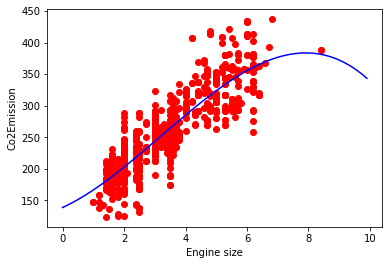

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
xx = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0] + regr.coef_[0][1]*xx + regr.coef_[0][2]*np.power(xx,2) + regr.coef_[0][3]*np.power(xx,3)
plt.plot(xx,yy,'-b')
plt.xlabel("Engine size")
plt.ylabel("Co2Emission")
plt.show()

In [18]:
from sklearn.metrics import r2_score
ytest_poly = poly.fit_transform(xtest)
y_hat = regr.predict(ytest_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - ytest)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - ytest) ** 2))
print("R2-score: %.2f" % r2_score(ytest,y_hat ) )

Mean absolute error: 23.56
Residual sum of squares (MSE): 970.17
R2-score: 0.79
